In [22]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt
from Useful_Functions import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Question 1. Does politics/election results affect SBA loan approval rate?

Step 1. Import Dataset

In [2]:
df = pd.read_csv('SBAnational_with_industry_added.csv')
df

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,...,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",Retail trade
1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,...,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",Accommodation and food services
2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,...,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",Health care and social assistance
3,3,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,...,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00",Manufacturing
4,4,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,...,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00",Other services (except public administration)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,899134,9995083010,RUSHING'S GROCERY,LAURINBURG,NC,28352,WELLS FARGO BANK NATL ASSOC,SD,0,27-Feb-97,...,N,NaN,31-Mar-97,"$25,455.00",$0.00,P I F,$0.00,"$20,000.00","$10,000.00",Retail trade
799542,899148,9995353008,FRANKIE'S CHICAGO STYLE PIZZA,MAPLE GROVE,MN,55369,WELLS FARGO BANK NATL ASSOC,SD,0,27-Feb-97,...,N,NaN,31-Mar-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00",Accommodation and food services
799543,899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,27-Feb-97,...,N,7-Jul-04,31-May-97,"$142,000.00",$0.00,CHGOFF,$0.00,"$142,000.00","$106,500.00",Retail trade
799544,899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,27-Feb-97,...,Y,NaN,30-Jun-97,"$79,000.00",$0.00,P I F,$0.00,"$79,000.00","$63,200.00",Other services (except public administration)


Step 2. Overview of the dataset

In [19]:
print(df.info())
print(df['Industry'].isna().sum()/df.shape[0])   #all of them have an industry, so cleaning worked
#print(df['Industry'].value_counts())
print(df['State'].isna().sum()/df.shape[0]) # every row has state info



<class 'pandas.core.frame.DataFrame'>
Int64Index: 799546 entries, 0 to 799545
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         799546 non-null  int64  
 1   LoanNr_ChkDgt      799546 non-null  int64  
 2   Name               799546 non-null  object 
 3   City               799534 non-null  object 
 4   State              799546 non-null  object 
 5   Zip                799546 non-null  int64  
 6   Bank               798476 non-null  object 
 7   BankState          798470 non-null  object 
 8   NAICS              799546 non-null  int64  
 9   ApprovalDate       799546 non-null  object 
 10  ApprovalFY         799546 non-null  object 
 11  Term               799546 non-null  int64  
 12  NoEmp              799546 non-null  int64  
 13  NewExist           799410 non-null  float64
 14  CreateJob          799546 non-null  int64  
 15  RetainedJob        799546 non-null  int64  
 16  Fr

Step 3. Data cleaning, remove or fill missing info

In [20]:
df = df[df['State'].notna()]
df = df[df['Name'].notna()]
df['Name'] = df['Name'].astype(str)

#Fill MIS column
for x in df[df['MIS_Status'].isnull()]['ChgOffPrinGr'].index:
    if df['ChgOffPrinGr'][x] == 0:
        df.loc[x,'MIS_Status'] = "P I F"
    else:
        df.loc[x,'MIS_Status'] = "CHGOFF"

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799546 entries, 0 to 799545
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         799546 non-null  int64  
 1   LoanNr_ChkDgt      799546 non-null  int64  
 2   Name               799546 non-null  object 
 3   City               799534 non-null  object 
 4   State              799546 non-null  object 
 5   Zip                799546 non-null  int64  
 6   Bank               798476 non-null  object 
 7   BankState          798470 non-null  object 
 8   NAICS              799546 non-null  int64  
 9   ApprovalDate       799546 non-null  object 
 10  ApprovalFY         799546 non-null  object 
 11  Term               799546 non-null  int64  
 12  NoEmp              799546 non-null  int64  
 13  NewExist           799410 non-null  float64
 14  CreateJob          799546 non-null  int64  
 15  RetainedJob        799546 non-null  int64  
 16  Fr

In [26]:
#Drop dollar sign in some columns and convert them to float
df['DisbursementGross'] = df['DisbursementGross'].apply(clean_currency).astype('float')
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(clean_currency).astype('float')
df['GrAppv'] = df['GrAppv'].apply(clean_currency).astype('float')
df['SBA_Appv'] = df['SBA_Appv'].apply(clean_currency).astype('float')
df['BalanceGross'] = df['BalanceGross'].apply(clean_currency).astype('float')
df

,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,...,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade
1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,...,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services
2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,...,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance
3,3,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,...,N,NaN,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing
4,4,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,...,Y,NaN,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other services (except public administration)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,899134,9995083010,RUSHING'S GROCERY,LAURINBURG,NC,28352,WELLS FARGO BANK NATL ASSOC,SD,0,27-Feb-97,...,N,NaN,31-Mar-97,25455.0,0.0,P I F,0.0,20000.0,10000.0,Retail trade
799542,899148,9995353008,FRANKIE'S CHICAGO STYLE PIZZA,MAPLE GROVE,MN,55369,WELLS FARGO BANK NATL ASSOC,SD,0,27-Feb-97,...,N,NaN,31-Mar-97,100000.0,0.0,P I F,0.0,100000.0,80000.0,Accommodation and food services
799543,899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,27-Feb-97,...,N,7-Jul-04,31-May-97,142000.0,0.0,CHGOFF,0.0,142000.0,106500.0,Retail trade
799544,899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,27-Feb-97,...,Y,NaN,30-Jun-97,79000.0,0.0,P I F,0.0,79000.0,63200.0,Other services (except public administration)


In [46]:
#ApprovalFY column has some weird entry that has alphabet, need to drop the alphabet
print(df['ApprovalFY'].unique())
df['ApprovalFY'] = df['ApprovalFY'].apply(lambda x: ''.join(filter(str.isdigit,str(x)))).apply(lambda x:int(x))
print(df['ApprovalFY'].unique())




[1997 2006 1998 1999 2000 2001 2003 2004 2005 1984 2007 1987 2008 1988
 2009 1989 1990 2010 1991 2011 1992 2002 2012 1993 2013 1994 2014 1995
 1996 1980 1972 1978 1979 1981 1962 1982 1983 1973 1985 1986 1974 1975
 1976 1968 1977 1970 1971]
[1997 2006 1998 1999 2000 2001 2003 2004 2005 1984 2007 1987 2008 1988
 2009 1989 1990 2010 1991 2011 1992 2002 2012 1993 2013 1994 2014 1995
 1996 1980 1972 1978 1979 1981 1962 1982 1983 1973 1985 1986 1974 1975
 1976 1968 1977 1970 1971]


Step 4.Add federal election result (party in power) to each loan

In [53]:
#importing federal election result csv
federal_election_df = pd.read_csv('US_President.csv')


2014-12-31 00:00:00


Timestamp('1962-12-07 00:00:00')

In [54]:
#need to use datetime for matching loan and federal party in power, create datetime objects
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], dayfirst=True, format='%d-%b-%y') #year data for some rows are off
print(df['ApprovalDate'].max())
df['ApprovalDate'] = fix_year(df['ApprovalDate'],df['ApprovalFY'])

federal_election_df['start date'] = pd.to_datetime(federal_election_df['From'])
federal_election_df['end date'] = pd.to_datetime(federal_election_df['To'],errors='coerce')  # the last end date is current, which is a string, replace it with NAT
federal_election_df['end date'] = federal_election_df['end date'].fillna(pd.to_datetime('2021-01-20'))  # Replace NAT with the googled last day of Trump's presidency term

2014-12-31 00:00:00


,#,President,From,To,Party,start date,end date
0,18,Ulysses S. Grant,"Mar 4, 1869","Mar 4, 1877",Republican,1869-03-04,1877-03-04
1,19,Rutherford Hayes,"Mar 4, 1877","Mar 4, 1881",Republican,1877-03-04,1881-03-04
2,20,James A. Garfield,"Mar 4, 1881","Sep 19, 1881",Republican,1881-03-04,1881-09-19
3,21,Chester A. Arthur,"Sep 19, 1881","Mar 4, 1885",Republican,1881-09-19,1885-03-04
4,22,Grover Cleveland,"Mar 4, 1885","Mar 4, 1889",Democratic,1885-03-04,1889-03-04
5,23,Benjamin Harrison,"Mar 4, 1889","Mar 4, 1893",Republican,1889-03-04,1893-03-04
6,24,Grover Cleveland,"Mar 4, 1893","Mar 4, 1897",Democratic,1893-03-04,1897-03-04
7,25,William McKinley,"Mar 4, 1897",1901-09-14,Republican,1897-03-04,1901-09-14
8,26,Theodore Roosevelt,1901-09-14,1909-03-04,Republican,1901-09-14,1909-03-04
9,27,William Howard Taft,1909-03-04,1913-03-04,Republican,1909-03-04,1913-03-04


In [55]:
#merge two dataframe based on ApprovalDate from df, and start date and end date from federal_election_df, add a new column to pd that is federal party in power when the loan was approved, run time is long, need to save a checkpoint
df_with_party = merge_on_date(df, federal_election_df, 'President Party','Party')

In [56]:
df_with_party

,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,President Party
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,...,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade,Democratic
1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,...,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services,Democratic
2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,...,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance,Democratic
3,3,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,...,NaN,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing,Democratic
4,4,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,...,NaN,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other services (except public administration),Democratic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,899134,9995083010,RUSHING'S GROCERY,LAURINBURG,NC,28352,WELLS FARGO BANK NATL ASSOC,SD,0,1997-02-27,...,NaN,31-Mar-97,25455.0,0.0,P I F,0.0,20000.0,10000.0,Retail trade,Democratic
799542,899148,9995353008,FRANKIE'S CHICAGO STYLE PIZZA,MAPLE GROVE,MN,55369,WELLS FARGO BANK NATL ASSOC,SD,0,1997-02-27,...,NaN,31-Mar-97,100000.0,0.0,P I F,0.0,100000.0,80000.0,Accommodation and food services,Democratic
799543,899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,1997-02-27,...,7-Jul-04,31-May-97,142000.0,0.0,CHGOFF,0.0,142000.0,106500.0,Retail trade,Democratic
799544,899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,1997-02-27,...,NaN,30-Jun-97,79000.0,0.0,P I F,0.0,79000.0,63200.0,Other services (except public administration),Democratic


In [57]:
df_with_party.to_csv('df_with_party.csv')

In [63]:
#Decide which features to include in the logistic regression model, first using logics, select the following features as a starting point
selected_features = ['State','Term','NoEmp','NewExist','CreateJob','RetainedJob','FranchiseCode','UrbanRural','RevLineCr','GrAppv','SBA_Appv','Industry','President Party']
new_df = df_with_party[selected_features]
new_df

,State,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,GrAppv,SBA_Appv,Industry,President Party
0,IN,84,4,2.0,0,0,1,0,N,60000.0,48000.0,Retail trade,Democratic
1,IN,60,2,2.0,0,0,1,0,N,40000.0,32000.0,Accommodation and food services,Democratic
2,IN,180,7,1.0,0,0,1,0,N,287000.0,215250.0,Health care and social assistance,Democratic
3,CT,120,19,1.0,0,0,1,0,N,517000.0,387750.0,Manufacturing,Democratic
4,FL,84,1,2.0,0,0,1,0,N,45000.0,36000.0,Other services (except public administration),Democratic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,NC,60,4,1.0,0,0,1,0,T,20000.0,10000.0,Retail trade,Democratic
799542,MN,120,25,1.0,0,0,1,0,0,100000.0,80000.0,Accommodation and food services,Democratic
799543,NY,119,5,1.0,0,0,1,0,0,142000.0,106500.0,Retail trade,Democratic
799544,TX,84,5,2.0,0,0,1,0,N,79000.0,63200.0,Other services (except public administration),Democratic


In [69]:
new_df['SBA_backed_portion'] = new_df['SBA_Appv']/new_df['GrAppv']
new_df['Republican'] = [1 if x == 'Republican' else 0 for x in new_df['President Party']]
new_df

<ipython-input-69-8d716db1d2e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SBA_backed_portion'] = new_df['SBA_Appv']/new_df['GrAppv']
<ipython-input-69-8d716db1d2e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Republican'] = [1 if x == 'Republican' else 0 for x in new_df['President Party']]


,State,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,GrAppv,SBA_Appv,Industry,President Party,SBA_backed_portion,Republican
0,IN,84,4,2.0,0,0,1,0,N,60000.0,48000.0,Retail trade,Democratic,0.80,0
1,IN,60,2,2.0,0,0,1,0,N,40000.0,32000.0,Accommodation and food services,Democratic,0.80,0
2,IN,180,7,1.0,0,0,1,0,N,287000.0,215250.0,Health care and social assistance,Democratic,0.75,0
3,CT,120,19,1.0,0,0,1,0,N,517000.0,387750.0,Manufacturing,Democratic,0.75,0
4,FL,84,1,2.0,0,0,1,0,N,45000.0,36000.0,Other services (except public administration),Democratic,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,NC,60,4,1.0,0,0,1,0,T,20000.0,10000.0,Retail trade,Democratic,0.50,0
799542,MN,120,25,1.0,0,0,1,0,0,100000.0,80000.0,Accommodation and food services,Democratic,0.80,0
799543,NY,119,5,1.0,0,0,1,0,0,142000.0,106500.0,Retail trade,Democratic,0.75,0
799544,TX,84,5,2.0,0,0,1,0,N,79000.0,63200.0,Other services (except public administration),Democratic,0.80,0


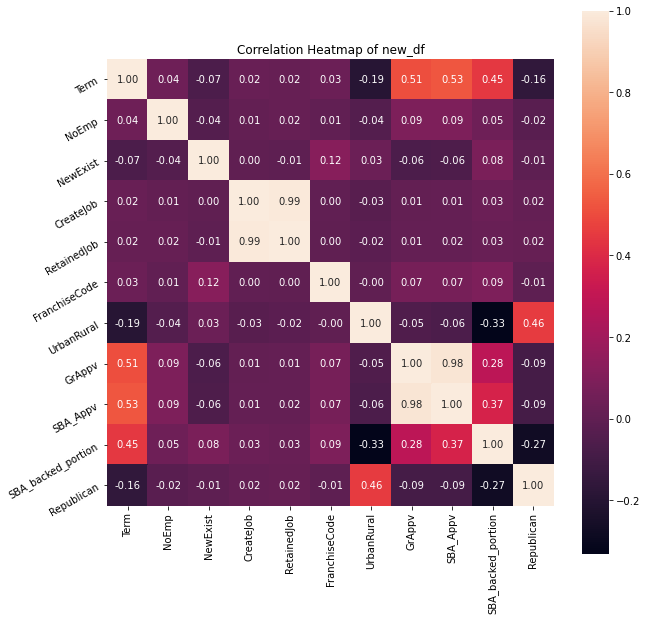

In [70]:
#correlation to see if there is pattern
correlation = new_df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap of new_df')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
#